# Exploration of form-based signatures

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import dask.dataframe
import matplotlib.pyplot as plt
import urbangrammar_graphics as ugg

from matplotlib.lines import Line2D

In [2]:
%time data = dask.dataframe.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/form/standardized/").replace([np.inf, -np.inf], np.nan).fillna(0)
%time data = data.compute().set_index('hindex')

CPU times: user 105 ms, sys: 138 ms, total: 244 ms
Wall time: 290 ms
CPU times: user 51.5 s, sys: 40.5 s, total: 1min 32s
Wall time: 1min 50s


In [3]:
labels_l1 = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/k8_form_labels.pq")
labels_l2_4 = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c4_form_labels.pq")
labels_l2_2 = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c2_form_labels.pq")

In [4]:
labels = labels_l1.copy()
labels.loc[labels.k8 == 4, 'k8'] = labels_l2_4['9'].values + 40
labels.loc[labels.k8 == 2, 'k8'] = labels_l2_2['8'].values + 20

In [5]:
labels

,k8
hindex,
c000e094707t0000,0
c000e094763t0000,5
c000e094763t0001,5
c000e094763t0002,5
c000e094764t0000,5
...,...
c102e644989t0111,5
c102e644989t0112,5
c102e644989t0113,5


In [6]:
outliers = [6, 44, 48, 43]
mask = ~labels.k8.isin(outliers)

In [7]:
labels.columns = ["label"]

In [8]:
group = data.groupby(labels['label'].values).mean()  # cluster centroids

In [9]:
group.columns.values

array(['sdbAre_q1', 'sdbAre_q2', 'sdbAre_q3', 'sdbPer_q1', 'sdbPer_q2',
       'sdbPer_q3', 'sdbCoA_q1', 'sdbCoA_q2', 'sdbCoA_q3', 'ssbCCo_q1',
       'ssbCCo_q2', 'ssbCCo_q3', 'ssbCor_q1', 'ssbCor_q2', 'ssbCor_q3',
       'ssbSqu_q1', 'ssbSqu_q2', 'ssbSqu_q3', 'ssbERI_q1', 'ssbERI_q2',
       'ssbERI_q3', 'ssbElo_q1', 'ssbElo_q2', 'ssbElo_q3', 'ssbCCM_q1',
       'ssbCCM_q2', 'ssbCCM_q3', 'ssbCCD_q1', 'ssbCCD_q2', 'ssbCCD_q3',
       'stbOri_q1', 'stbOri_q2', 'stbOri_q3', 'sdcLAL_q1', 'sdcLAL_q2',
       'sdcLAL_q3', 'sdcAre_q1', 'sdcAre_q2', 'sdcAre_q3', 'sscCCo_q1',
       'sscCCo_q2', 'sscCCo_q3', 'sscERI_q1', 'sscERI_q2', 'sscERI_q3',
       'stcOri_q1', 'stcOri_q2', 'stcOri_q3', 'sicCAR_q1', 'sicCAR_q2',
       'sicCAR_q3', 'stbCeA_q1', 'stbCeA_q2', 'stbCeA_q3', 'mtbAli_q1',
       'mtbAli_q2', 'mtbAli_q3', 'mtbNDi_q1', 'mtbNDi_q2', 'mtbNDi_q3',
       'mtcWNe_q1', 'mtcWNe_q2', 'mtcWNe_q3', 'mdcAre_q1', 'mdcAre_q2',
       'mdcAre_q3', 'ltcWRE_q1', 'ltcWRE_q2', 'ltcWRE_q3', 'ltbI

In [10]:
sel = group[["sicCAR_q2", "lcdMes_q2", "sdcLAL_q2", "stbCeA_q1", "stcOri_q2", "linPDE_q2", "ssbCor_q3" ,"sdbAre_q3", "sddAre_q2"]]

In [11]:
sel = (sel-sel.min())/(sel.max()-sel.min()) 
sel

,sicCAR_q2,lcdMes_q2,sdcLAL_q2,stbCeA_q1,stcOri_q2,linPDE_q2,ssbCor_q3,sdbAre_q3,sddAre_q2
0,0.326064,0.277856,0.240502,0.706473,0.871973,0.699971,1.119532e-02,0.042313,0.404416
1,0.482047,0.362348,0.083403,0.519900,0.829345,0.619649,1.669432e-02,0.067230,0.237370
3,0.305631,0.287905,0.312750,0.646587,0.965733,0.764049,1.568136e-02,0.036948,0.454185
5,0.413370,0.309513,0.127579,0.610906,0.831341,0.665396,1.290708e-02,0.051744,0.295283
6,0.464284,0.000000,0.210695,0.393272,0.000000,1.000000,3.361835e-18,0.177451,0.262379
7,0.000000,0.087568,1.000000,1.000000,1.000000,0.941431,1.647299e-16,0.065779,1.000000
20,0.551620,0.486684,0.062880,0.395459,0.723952,0.525718,2.955567e-02,0.088063,0.148939
21,0.565900,0.453098,0.053280,0.394376,0.818832,0.530562,5.949657e-02,0.150553,0.121038
22,0.560256,0.442562,0.047341,0.414214,0.744077,0.546407,2.617269e-02,0.108811,0.133056
23,0.550755,0.440602,0.053681,0.420885,0.874504,0.549118,2.954338e-02,0.109329,0.137769


In [12]:
cmap = ugg.get_colormap(len(sel), randomize=True)

In [13]:
len(sel)

23

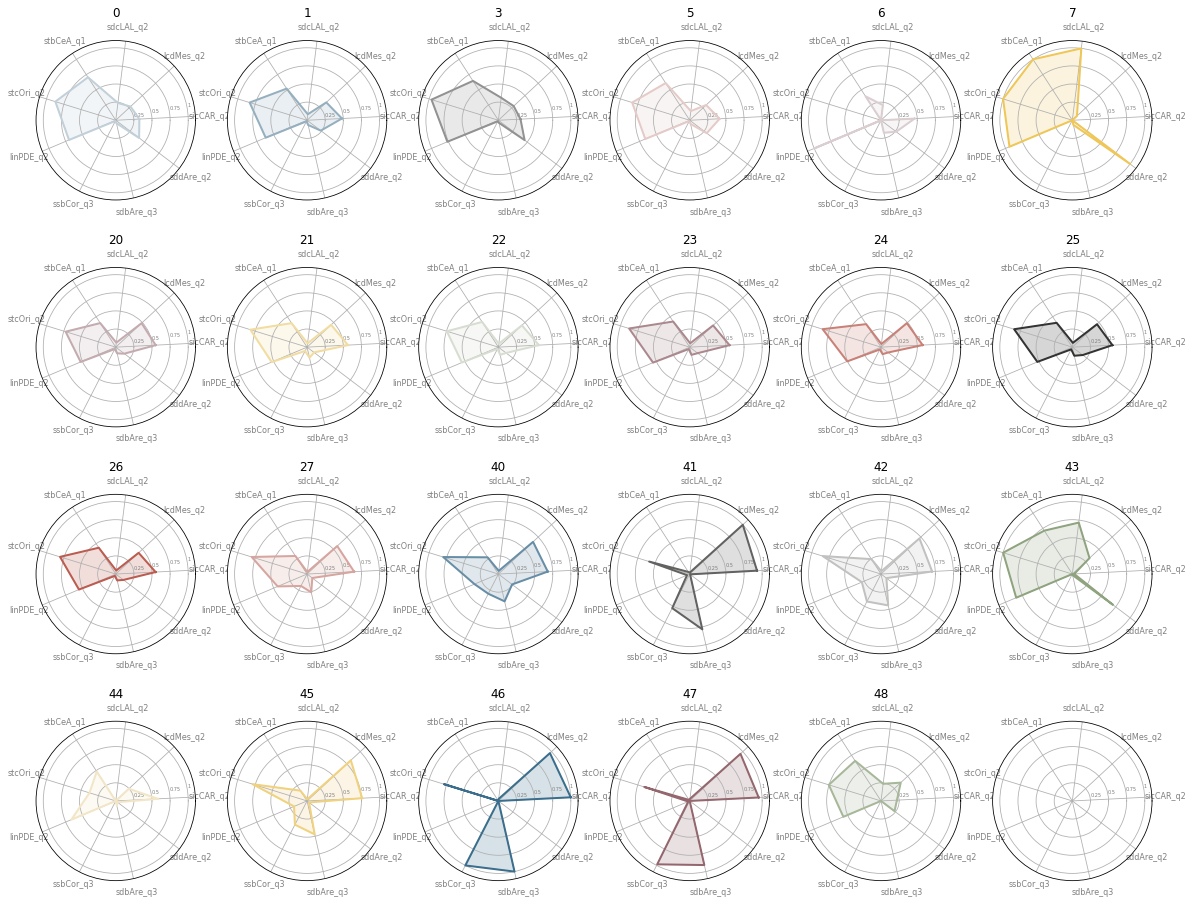

In [19]:
fig, axs = plt.subplots(4, 6, figsize=(20, 16), subplot_kw={'projection': 'polar'})

N = len(sel.columns)
angles = [(n / float(N) * 2 * np.pi)  + .05 for n in range(N)]
angles += angles[:1]

for i, ax in enumerate(axs.flatten()):
    try:
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(sel.columns, color='grey', size=8)
        ax.set_ylim(0, 1.1)
        ax.set_yticks([.25, .5, .75, 1])
        ax.set_yticklabels([.25, .5, .75, 1], color='grey', size=5)
        ax.set_rlabel_position(10)
        ax.set_title(sel.index[i])

        values = sel.iloc[i].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', color=cmap.colors[i])
        ax.fill(angles, values, 'b', alpha=0.2, color=cmap.colors[i])
    except IndexError:
        continue

fig.set_facecolor('white')

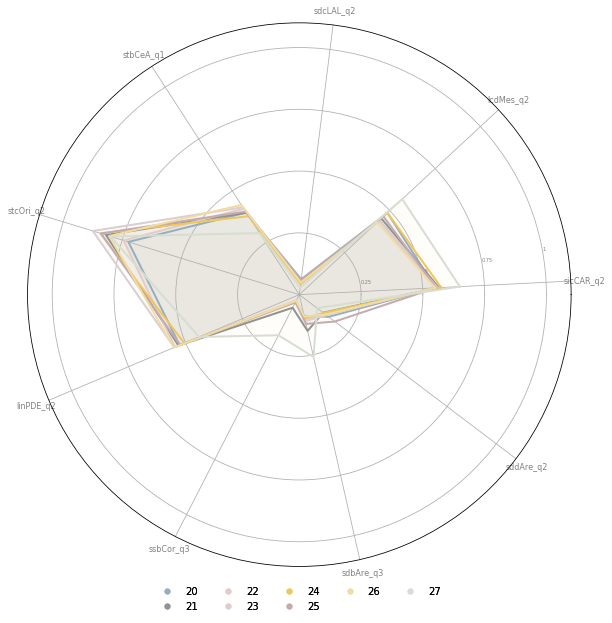

In [27]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

N = len(sel.columns)
angles = [(n / float(N) * 2 * np.pi)  + .05 for n in range(N)]
angles += angles[:1]

ax.set_xticks(angles[:-1])
ax.set_xticklabels(sel.columns, color='grey', size=8)
ax.set_ylim(0, 1.1)
ax.set_yticks([.25, .5, .75, 1])
ax.set_yticklabels([.25, .5, .75, 1], color='grey', size=5)
ax.set_rlabel_position(10)
custom_points = []

opts = [o for o in sel.index if str(o).startswith('2')]

for n, i in enumerate(opts):
    values = sel.loc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=cmap.colors[n + 1])
    ax.fill(angles, values, 'b', alpha=0.05, color=cmap.colors[n])
    
    custom_points.append(Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=cmap.colors[n + 1]))

fig.set_facecolor('white')
leg_points = ax.legend(custom_points, opts, loc='lower center', frameon=False, ncol=5, bbox_to_anchor=(0.5, -0.1))
ax.add_artist(leg_points)

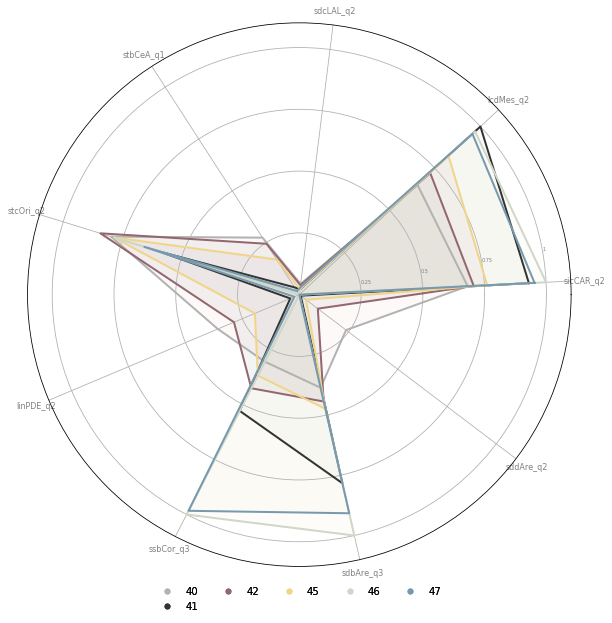

In [29]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

cmap = ugg.get_colormap()

N = len(sel.columns)
angles = [(n / float(N) * 2 * np.pi)  + .05 for n in range(N)]
angles += angles[:1]

ax.set_xticks(angles[:-1])
ax.set_xticklabels(sel.columns, color='grey', size=8)
ax.set_ylim(0, 1.1)
ax.set_yticks([.25, .5, .75, 1])
ax.set_yticklabels([.25, .5, .75, 1], color='grey', size=5)
ax.set_rlabel_position(10)
custom_points = []

opts = [o for o in sel.index if str(o).startswith('4') and o not in [43, 44, 48]]

for n, i in enumerate(opts):
    values = sel.loc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=cmap.colors[n + 1])
    ax.fill(angles, values, 'b', alpha=0.05, color=cmap.colors[n])
    
    custom_points.append(Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=cmap.colors[n + 1]))

fig.set_facecolor('white')
leg_points = ax.legend(custom_points, opts, loc='lower center', frameon=False, ncol=5, bbox_to_anchor=(0.5, -0.1))
ax.add_artist(leg_points)

# Summary

## Countryside

Cluster 0

- Large scale countryside without agriculture

Cluster 3

- Even larger countryside (Highlands, Lowlands)

Cluster 5

- Counstryside with agriculture

Cluster 7

- yet another countryside class (one bit in Highlands)


## Urban areas

### Periphery

Cluster 1

- Green belt area; urban periphery mixing with countryside, low density, small scale development


### Outer parts

Cluster 2-5

- Predominantly residential neighbourhoods with direct access to large urban green open spaces.

Cluster 2-2

- peripheral, low density residential neighbourhoods; N-S orientation

Cluster 2-3

- peripheral, low density residential neighbourhoods; rotated (45) orientation

Cluster 2-6

- peripheral residential development. relatively well connected network with a low density, wide and open streets.

Cluster 2-0

- relatively well connected but less granular than 2-6

Cluster 2-4

- Compact peripheral neighbourhoods, potentially centers of peripheral districts with well connected networks

Cluster 2-7

- Near center, still relatively dense development with slightly larger and more complex buildings

Cluster 2-1

- peripheral development with a high ratio of large buildings, potentially of industrial origin

### Centers

Central signatures (4-x) are organised in a pyramid way from less central to more. The gradient follows rising density, building area and building complexity.

Only larger cities have these signatures and can be organised based on the number of types present.

London is the only place to have all of them (4-6 and 4-7 are only in London). 4-1 is also in Birmingham, and very marginally in Manchester. 

4-5 is more common (centers of Edinburgh and Glasgow, Bristol, Sheffield or Manchester) and 4-2 even more (centers of Liverpool or Southampton).

